# CEWA 565 - Homework 2

### Daniel Hogan

### 10/19/2021


### **Part A.** 

*Descriptive Plots: Decide which of your plots from Homework 1 are relevant to the question of whether a change in flood statistics occurred in the Sauk River around 1977.*
*8Include these plots from Homework 1 here.
Discuss what you can see visually in the graphs that would lead you to believe that a change has or has not occurred.*

**The cdf plot shows how the frequency of peak flows has shifted higher since 1977.**

![F1](cdf_plot.png)

**The pdf plot illustrates how the probability of a higher peak flow has increased since 1977.**

![F2](pdf_plot.png)

**The box plot comparison plot shows how the median peak flow has increased in value and the 75th percentile has shifted higher since 1977.**

![F3](box_plot.png)

## **Part B.**

*Two-sample test for a change in the mean: Test for statistical significance of the observed change in the mean annual peak flow around 1977.*

- *Use a two sample test, and alpha = 0.05 (95% confidence) and the z-distribution to define the rejection region.*
- *Discuss why using the z-distribution is appropriate here.*
- *Use the two-sample test to compare the data from 1977-2020 to the data from 1929-1976, accounting for the different sample sizes and sample standard deviations appropriately (remember to use the “pooled standard deviation”).*
- *For your null hypothesis, postulate that the difference between the two means = 0, and state the alternative hypothesis that the difference has changed (although you don't know the direction of this change) and state the test statistic you'll be using.*
- *Can you reject the null hypothesis?*
- *Calculate P after your test.*
- *How does your estimate of P change if your null hypothesis is that the difference in the mean between the two data sets is equal to 25% of the pre-1977 sample mean? (In other words, test with a new null hypothesis: the mean of the second period is 1.25 times the mean of the first period.)*

In [2]:
# import packages to be used
import numpy as np
import pandas as pd
import os
import scipy.stats as stats

import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
%matplotlib inline

***Use a two sample test, and alpha = 0.05 (95% confidence) and the z-distribution to define the rejection region.***

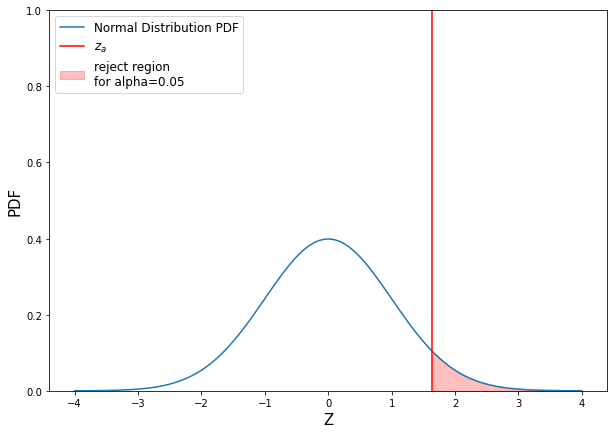

In [3]:
fig, ax = plt.subplots(figsize=(10,7))

# code adapted from Lab 2-1
# create null pdf
x = np.linspace(-4,4, num=160)
ax.plot(x, 
        stats.norm.pdf(x,0,1), 
        label='Normal Distribution PDF') # 0 and 1 are mu and sigma

# # plot the null cdf
# ax.plot(x, 
#         stats.norm.cdf(x,0,1), 
#         ls='--',
#         label='Normal Distribution CDF')

# define alpha
alpha = 0.05
# Plot the region that z_test would have to fall in in order for us to reject the null hypothesis
conf = 1-alpha
z_alpha = stats.norm.ppf(conf)
shade_region = np.linspace(z_alpha,4,10)
ax.fill_between(shade_region,
                stats.norm.pdf(shade_region,0,1), 
                color='r', 
                alpha=0.25, 
                label='reject region\nfor alpha={}'.format(np.round(1-conf,2)))
# Plot a line at z_alpha
plt.axvline(z_alpha, 
            color='r', 
            label='$z_{a}$')
# # Plot a line at 95% confidence interval
# plt.axhline(conf, 
#             color='black', 
#             linestyle='--', 
#             label='Confidence = {}%'.format(conf*100))
# Add labels
ax.set_ylim((0,1))
plt.xlabel('Z', fontsize=15)
plt.ylabel('PDF', fontsize=15)
ax.legend(fontsize=12)

In [4]:
# change working directory
path = '/home/jovyan/Week-2/HW-2/'
os.chdir(path)
# save each river peak flow file 
sauk_peaks = pd.read_excel('Sauk_peak_WY1929_2017.xlsx',skiprows=6).iloc[1:]

/opt/conda/lib/python3.8/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [5]:
# genarate pre and post 1977 Sauk River datasets
sauk_peaks_b = sauk_peaks[sauk_peaks['water_year']<1977]
sauk_peaks_a = sauk_peaks[sauk_peaks['water_year']>=1977]
# check that sample size is long enough
b_len = len(sauk_peaks_b)
a_len = len(sauk_peaks_a)
if b_len < 30:
    print('{} Sauk River peak flow data points before 1977. Central limit theorem will not be accurate. \n\
    Normal distribution not appropriate.'.format(str(len(sauk_peaks_b))))
else:
    print('{} Sauk River peak flow data points before 1977. Central limit theorem can be used. \n\
    Normal distribution appropriate.'.format(str(len(sauk_peaks_b))))    
if a_len < 30:
    print('{} Sauk River peak flow data points after 1977. Central limit theorem will not be accurate. \n\
    Normal distribution not appropriate.'.format(str(len(sauk_peaks_a))))
else:
    print('{} Sauk River peak flow data points after 1977. Central limit theorem can be used. \n\
    Normal distribution appropriate.'.format(str(len(sauk_peaks_a))))


48 Sauk River peak flow data points before 1977. Central limit theorem can be used. 
    Normal distribution appropriate.
44 Sauk River peak flow data points after 1977. Central limit theorem can be used. 
    Normal distribution appropriate.


***Discuss why using the z-distribution is appropriate here.***

Since both subsets of the overall data have n>30, the central limit theorem can be applied. This theorem stipulates that if a sample of n values is extracted from a population with mean $\mu$ and standard deviation $\sigma$, and n>30, then the means of these samples are *approximately* normally distributed. Although the data themselves are not normally distributed, the means are of these data.

***Use the two-sample test to compare the data from 1977-2020 to the data from 1929-1976, accounting for the different sample sizes and sample standard deviations appropriately (remember to use the “pooled standard deviation”).***

Compute which $z_\alpha$ is equal to the confidence interval (95%) of our CDF

In [6]:
z_alpha = stats.norm.ppf(conf)
print("z_alpha = {}".format(z_alpha)) 

z_alpha = 1.6448536269514722


Compute the pooled standard deviation, $s_{1,2} = \displaystyle\sqrt{ \displaystyle\frac{s^2_1}{n_1} + \displaystyle\frac{s^2_2}{n_2} }$

In [7]:
s_pooled = np.sqrt((sauk_peaks_b['peak_va'].std(ddof=1)**2)/b_len +
                   (sauk_peaks_a['peak_va'].std(ddof=1)**2)/a_len)
print('Pooled standard deviation is {} cfs'.format(str(s_pooled)))

Pooled standard deviation is 4025.984702086414 cfs


***For your null hypothesis, postulate that the difference between the two means = 0, and state the alternative hypothesis that the difference has changed (although you don't know the direction of this change) and state the test statistic you'll be using. Can you reject the null hypothesis? Calculate P after your test.***

Null Hypothesis: $$\bar{x}-\bar{y} = \Delta_o$$
Alternate Hypotheses: $$\bar{x}-\bar{y} > \Delta_o$$ $$\bar{x}-\bar{y} < \Delta_o$$ $$\bar{x}-\bar{y} \neq \Delta_o$$
Compute z-test statistic value, assuming no difference in the sample mean ($\Delta_o = 0$) $$z_{test} = \frac{(\bar{x}-\bar{y})-\Delta_o}{s_{pooled}}$$



In [33]:
# null hypothesis: no change in sample means
delta = 0*sauk_peaks_b['peak_va'].mean()
# compute test statistic
z_test = ((sauk_peaks_a['peak_va'].mean()-sauk_peaks_b['peak_va'].mean())-
          delta)/s_pooled
print("z-score = {}".format(np.round(z_test,2))) 

z-score = 2.58


Plot up to visualize the result:

p = 0.005


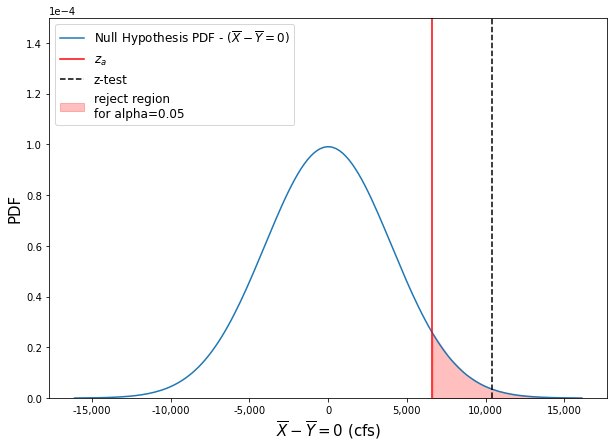

In [34]:
fig, ax = plt.subplots(figsize=(10,7))

# code adapted from Lab 2-1
# create null pdf
z = np.linspace(-4,4, num=160)*s_pooled
ax.plot(z, 
        stats.norm.pdf(z,delta,s_pooled), 
        label='Null Hypothesis PDF - ($\overline{X}-\overline{Y}=0$)') # 0 and 1 are mu and sigma

# define alpha
alpha = 0.05
# Plot the region that z_test would have to fall in in order for us to reject the null hypothesis
conf = 1-alpha
z_alpha = stats.norm.ppf(conf)
shade_region = np.linspace(z_alpha*s_pooled,np.max(z),10)
ax.fill_between(shade_region,
                stats.norm.pdf(shade_region,delta,s_pooled), 
                color='r', 
                alpha=0.25, 
                label='reject region\nfor alpha={}'.format(np.round(1-conf,2)))
# Plot a line at 95% confidence interval
plt.axvline(z_alpha*s_pooled, 
            color='r', 
            label='$z_{a}$')
# Plot a line at z_test
plt.axvline(z_test*s_pooled, 
            color='black', 
            linestyle='--', 
            label='z-test')
# Add labels
ax.set_ylim((0,1.5e-4))
ax.set_xlabel('$\overline{X}-\overline{Y}=0$ (cfs)', fontsize=15)
ax.set_ylabel('PDF', fontsize=15)
ax.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
ax.legend(fontsize=12)
ax.get_xaxis().set_major_formatter(mticker.FuncFormatter(lambda x, p: format(int(x), ','))) # reference 1

# compute p value
pvalue = 1 - stats.norm.cdf(z_test)
print("p = {}".format(np.round(pvalue,3)))

The z-test run indicates that the null hypothesis can be rejected (i.e. peak flows have increased). The resultant p-value is 0.005.

***How does your estimate of P change if your null hypothesis is that the difference in the mean between the two data sets is equal to 25% of the pre-1977 sample mean? (In other words, test with a new null hypothesis: the mean of the second period is 1.25 times the mean of the first period.)***

*New* Null Hypothesis: $$\bar{x}-\bar{y} = \Delta_{0.25}$$
Alternate Hypotheses: $$\bar{x}-\bar{y} > \Delta_{0.25}$$ $$\bar{x}-\bar{y} < \Delta_{0.25}$$ $$\bar{x}-\bar{y} \neq \Delta_{0.25}$$
Compute z-test statistic value, assuming no difference in the sample mean ($\Delta_{0.25} = 0.25\bar{Y}$) $$z_{test} = \frac{(\bar{x}-\bar{y})-\Delta_{0.25}}{s_{pooled}}$$

In [35]:
# new null hypothesis: 25% change in sample means
delta = 0.25*sauk_peaks_b['peak_va'].mean()
# compute test statistic
z_test = ((sauk_peaks_a['peak_va'].mean()-sauk_peaks_b['peak_va'].mean())-
          delta)/s_pooled
print("z-score = {}".format(np.round(z_test,2))) 

z-score = 0.62


p = 0.269


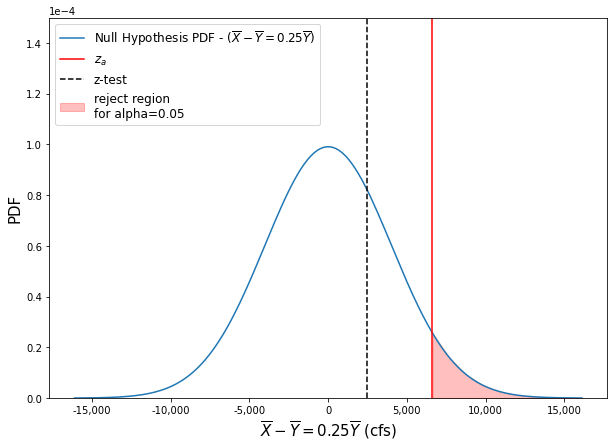

In [89]:
fig, ax = plt.subplots(figsize=(10,7))

# code adapted from Lab 2-1
# create null pdf
z = np.linspace(-4,4, num=160)*s_pooled
ax.plot(z, 
        stats.norm.pdf(z,0,s_pooled), 
        label='Null Hypothesis PDF - ($\overline{X}-\overline{Y}=0.25 \overline{Y}$)') 

# define alpha
alpha = 0.05
# Plot the region that z_test would have to fall in in order for us to reject the null hypothesis
conf = 1-alpha
z_alpha = stats.norm.ppf(conf)
shade_region = np.linspace(z_alpha*s_pooled,np.max(z),10)
ax.fill_between(shade_region,
                stats.norm.pdf(shade_region,0,s_pooled), 
                color='r', 
                alpha=0.25, 
                label='reject region\nfor alpha={}'.format(np.round(1-conf,2)))
# Plot a line at 95% confidence interval
plt.axvline(z_alpha*s_pooled, 
            color='r', 
            label='$z_{a}$')
# Plot a line at z_test
plt.axvline(z_test*s_pooled, 
            color='black', 
            linestyle='--', 
            label='z-test')
# Add labels
ax.set_ylim((0,1.5e-4))
ax.set_xlabel('$\overline{X}-\overline{Y}=0.25 \overline{Y}$ (cfs)', fontsize=15)
ax.set_ylabel('PDF', fontsize=15)
ax.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
ax.legend(fontsize=12)
ax.get_xaxis().set_major_formatter(mticker.FuncFormatter(lambda x, p: format(int(x), ','))) # reference 1

# compute p value
pvalue = 1 - stats.norm.cdf(z_test)
print("p = {}".format(np.round(pvalue,3)))

In the above case, when the difference in the mean of the two data sets is equal to 25% of the pre-1977 sample mean, the null hypothesis is not rejected (peak flows have not increased). P increases significantly to approximately 0.27, meaning that $\alpha$ would need to be at least 0.27 in order for the null hypothesis to be rejected. If $\alpha$ were changed to reject the null hypothesis, the confidence interval would then be around 73%.

### **Part C.**

*Type II Error: What is the type II error and power for your test on the mean in the first part of B above?*

*- To answer this, assume that the true mean has in fact increased by 25%, and pooled standard deviation has increased by a factor of 1.2. In other words, assume that the “true” mean of the later period is 1.25 times the 1929-1976 mean, and that the “true” pooled standard deviation is 1.2 times sigma prime (our test estimate of pooled estimator for the two observed data sets).*

*- Draw or plot a graphic to represent this true distribution, and draw where your test statistic falls on this graph. Color the area of the graph that represents Type II error.*

*- Then answer the question - what is the type II error and power for your test in part B?*

***Assume that the true mean has in fact increased by 25%, and pooled standard deviation has increased by a factor of 1.2. In other words, assume that the “true” mean of the later period is 1.25 times the 1929-1976 mean, and that the “true” pooled standard deviation is 1.2 times sigma prime (our test estimate of pooled estimator for the two observed data sets).***

$\bar{X_a}$ = mean peak flow after 1977

$\bar{X_b}$ = mean peak flow before 1977

Test estimate mean: $\bar{X_a}-\bar{X_b} = \Delta_o = 0$

Test estimate standard deviation: $\sigma' = \displaystyle\sqrt{ \displaystyle\frac{s^2_a}{n_1} + \displaystyle\frac{s^2_b}{n_2} }$

Compute z-test statistic value for test estimate: ($\Delta_o = 0$) 
$$z_{test} = \frac{(\bar{X_a}-\bar{X_b})}{\sigma'}$$

True mean: $\bar{X_a}-\bar{X_b} = \Delta_{0.25} = 0.25\bar{X_b}$

True pooled standard deviation = $s_{a,b} = 1.2\sigma'$

Compute z-test statistic value for true values: ($\Delta_{0.25} = 0.25\bar{X_b}$) 
$$z_{test} = \frac{(\bar{X_a}-\bar{X_b})-0.25\bar{X_b}}{1.2\sigma'}$$


In [94]:
# estimate: no change in sample means
delta_0 = 0
# compute pooled standard deviation, sigma'
sigma_prime = np.sqrt((sauk_peaks_b['peak_va'].std(ddof=1)**2)/b_len +
                   (sauk_peaks_a['peak_va'].std(ddof=1)**2)/a_len)
print('Pooled standard deviation is {} cfs'.format(np.round(sigma_prime,2)))
# compute test statistic
z_test = ((sauk_peaks_a['peak_va'].mean()-sauk_peaks_b['peak_va'].mean())-
          delta_0)/sigma_prime
print("z-score for test estimate = {}".format(np.round(z_test,2))) 

Pooled standard deviation is 4025.98 cfs
z-score for test estimate = 2.58


In [95]:
# true: 25% change in sample means
delta_true = 0.25*sauk_peaks_b['peak_va'].mean()
# compute pooled standard deviation, sigma'
s_true = 1.2*sigma_prime 
print('Pooled standard deviation is {} cfs'.format(np.round(s_true,2)))

Pooled standard deviation is 4831.18 cfs


Compute $z_{eff}$ from equation: $$\Delta^* + z_{eff}\sigma^* = \Delta_o + z_{\alpha}\sigma'$$

Rearranging this equation, we get:
$$z_{eff} = \frac{(\Delta_o + z_{\alpha}\sigma')-\Delta^*}{\sigma^*}$$

In [80]:
# compute z_eff
z_eff = (delta_0 + z_alpha*sigma_prime - delta_true)/s_true
print("z-eff = {}".format(np.round(z_eff,2))) 

z-score for true values = -0.26


***Draw or plot a graphic to represent this true distribution, and draw where your test statistic falls on this graph. Color the area of the graph that represents Type II error.***

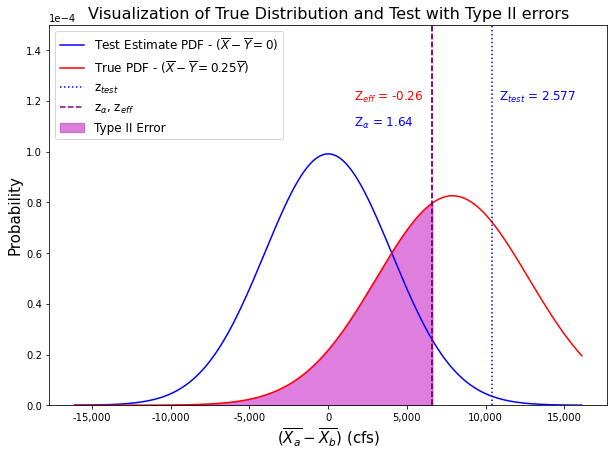

In [117]:
fig, ax = plt.subplots(figsize=(10,7))

# code adapted from Lab 2-2
z = np.linspace(-4,4, num=160)*sigma_prime
# create null pdf
ax.plot(z, 
        stats.norm.pdf(z,delta_0,sigma_prime), 
        color='blue',
        label='Test Estimate PDF - ($\overline{X}-\overline{Y}=0$)')
# create true pdf 
ax.plot(z, 
        stats.norm.pdf(z,delta_true,s_true), 
        color='red',
        label='True PDF - ($\overline{X}-\overline{Y}=0.25\overline{Y}$)')

# define alpha
alpha = 0.05

# Plot the region that z_test would have to fall in in order for us to reject the null hypothesis
conf = 1-alpha
z_alpha = stats.norm.ppf(conf)

# Plot a line at z_test
plt.axvline(z_test*sigma_prime, 
            color='b', 
            linestyle='dotted', 
            label=r'z$_{test}$')

# add label for z_test
plt.text(z_test*sigma_prime+500, 
         1.2e-4, 
         r'Z$_{test}$ = '+str(round(z_test,3)), 
         fontsize=12, 
         color='b')

# Plot line at z_alpha
plt.axvline(z_alpha*sigma_prime+delta_0, 
            color='purple', 
            linestyle='--', 
            label=r'z$_{\alpha}$, z$_{eff}$')

# Plot line at z_eff (for visualization purposes only)
plt.axvline(z_eff*s_true+delta_true, 
            color='purple', 
            linestyle='--')

# add labels for z_eff and z_alpha
plt.text(z_alpha*sigma_prime-5000, 
         1.2e-4, 
         r'Z$_{eff}$ = '+str(round(z_eff,2)), 
         fontsize=12, 
         color='r')
plt.text(z_alpha*sigma_prime-5000, 
         1.1e-4, 
         r'Z$_{\alpha}$ = '+str(round(z_alpha,2)), 
         fontsize=12, 
         color='b')

# Shade in the Type II Error area - everything from the min linspace to z_alpha*sigma_prime + delta_0
# this could also be z_eff*s_true + delta_true
shade = np.linspace(np.min(z),z_alpha*sigma_prime + delta_0, 30)
# fills up to the true pdf
plt.fill_between(shade, 
                 stats.norm.pdf(shade, delta_true, s_true) ,  
                 color='m', 
                 alpha=0.5, 
                 label='Type II Error')

# Add labels
ax.set_ylim((0,1.5e-4))
ax.set_title('Visualization of True Distribution and Test with Type II errors', fontsize = 16)
ax.set_xlabel('$(\overline{X_a}-\overline{X_b})$ (cfs)', fontsize=15)
ax.set_ylabel('Probability', fontsize=15)
ax.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
ax.legend(fontsize=12)
ax.get_xaxis().set_major_formatter(mticker.FuncFormatter(lambda x, p: format(int(x), ','))) # reference 1


In [106]:
# Look up the cdf value of the postulated true distribution at this point to get our beta vlaue
beta = stats.norm.cdf(z_eff)
print("Type II error: {}".format(np.round(beta,4)))

# Thus, our confidence that we are not commiting Type II error is
power = 1 - beta
print("Power: {}".format(np.round(power,4)))

Type II error: 0.3962
Power: 0.6038
